# Setup

In [7]:
import pandas as pd

df = pd.read_csv("../data/raw_data.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# Dataset Overview

In [10]:
print("Shape:", df.shape)
print("\nColumns:")
print(df.columns.tolist())

Shape: (12330, 18)

Columns:
['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

# Missing Values

In [30]:
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]

Series([], dtype: int64)

**No** missing values.

# Duplicate

In [13]:
n_dup = df.duplicated().sum()
print("Duplicate rows:", n_dup)

Duplicate rows: 125


125 duplicated rows detected.

## Inspect duplicates

In [15]:
dup_mask = df.duplicated(keep=False)
df_dups = df[dup_mask].sort_values(df.columns.tolist())
df_dups.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
8247,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,1,Returning_Visitor,True,False
10751,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,1,Returning_Visitor,True,False
11658,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,1,Returning_Visitor,True,False
8882,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,2,New_Visitor,False,False
11934,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,2,New_Visitor,False,False
11110,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,3,Returning_Visitor,False,False
12159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,3,Returning_Visitor,False,False
10341,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,4,1,Returning_Visitor,True,False
11801,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,4,1,Returning_Visitor,True,False
11938,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,4,1,Returning_Visitor,True,False


## Check if duplicates have conflicting Revenue values

In [ ]:
dup_groups = df[df.duplicated(keep=False)].groupby(df.columns.drop("Revenue").tolist())["Revenue"].nunique()
conflicts = dup_groups[dup_groups > 1]

print("Number of duplicate groups with conflicting Revenue:", len(conflicts))
conflicts.head()

Number of duplicate groups with conflicting Revenue: 0


Series([], Name: Revenue, dtype: int64)

- The duplicate rows are exactly identical across all predictors
- Many of them correspond to very low-engagement sessions (e.g., all zeros, minimal activity)

Meaning:
- All duplicate rows have the same Revenue label
- Dropping duplicates will not change the underlying relationship between predictors and outcome
- Keeping them would artificially overweight repeated session patterns

## Decision: Drop Duplicates
For modeling fairness, drop the duplicates:

In [31]:
df_clean = df.drop_duplicates().copy()

print("Original shape:", df.shape)
print("After removing duplicates:", df_clean.shape)
print("Duplicates removed:", df.shape[0] - df_clean.shape[0])

Original shape: (12330, 18)
After removing duplicates: (12205, 18)
Duplicates removed: 125


# Target Encoding & Distribution

## Encode Revenue as binary

The binary response variable Revenue was encoded as 0 (no purchase) and 1 (purchase) to ensure consistent target representation across classification models and evaluation metrics.

In [39]:
df_clean["Revenue"] = df_clean["Revenue"].astype(int)

df_clean["Revenue"].value_counts()

Revenue
0    10297
1     1908
Name: count, dtype: int64

In [32]:
rev_counts = df_clean["Revenue"].value_counts()
rev_rate = df_clean["Revenue"].mean()

print(rev_counts)
print(f"\nPurchase rate: {rev_rate:.3f}")

Revenue
False    10297
True      1908
Name: count, dtype: int64

Purchase rate: 0.156


Only about 15.6% of sessions result in a purchase, indicating a moderately imbalanced classification problem. This motivates the use of ROC-AUC, precision, and recall as evaluation metrics rather than accuracy alone.

## Visualize target distribution

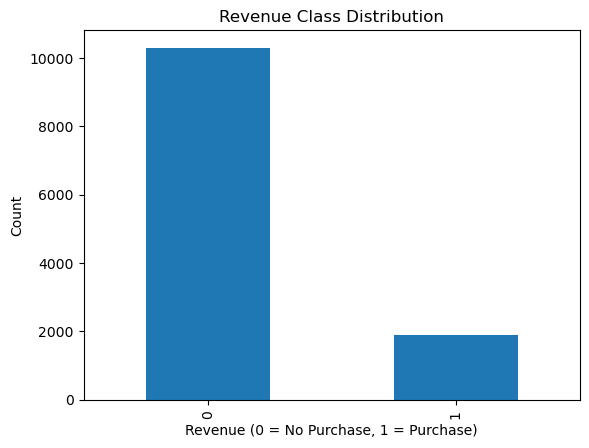

In [37]:
plt.figure()
df_clean["Revenue"].value_counts().plot(kind="bar")
plt.title("Revenue Class Distribution")
plt.xlabel("Revenue (0 = No Purchase, 1 = Purchase)")
plt.ylabel("Count")
plt.show()

This plot visually confirms the imbalance between purchasing and non-purchasing sessions.

# Feature Type Separation

After encoding the response variable, we separate predictors into numeric and categorical features to guide subsequent exploratory analysis and preprocessing steps. This is especially important because different models and preprocessing techniques handle numeric and categorical variables differently.

In [40]:
numeric_features = (
    df_clean
    .select_dtypes(include=["int64", "float64"])
    .columns
    .drop("Revenue")
    .tolist()
)

categorical_features = (
    df_clean
    .select_dtypes(include=["object", "bool"])
    .columns
    .tolist()
)

print("Numeric features:")
print(numeric_features)

print("\nCategorical features:")
print(categorical_features)

Numeric features:
['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']

Categorical features:
['Month', 'VisitorType', 'Weekend']


# Distribution of Numeric Features

To understand the scale, spread, and shape of the numeric predictors, we examine the distributions of all numeric features. This step helps identify skewness, outliers, and potential preprocessing considerations, such as transformations or model choices that are robust to non-normality.

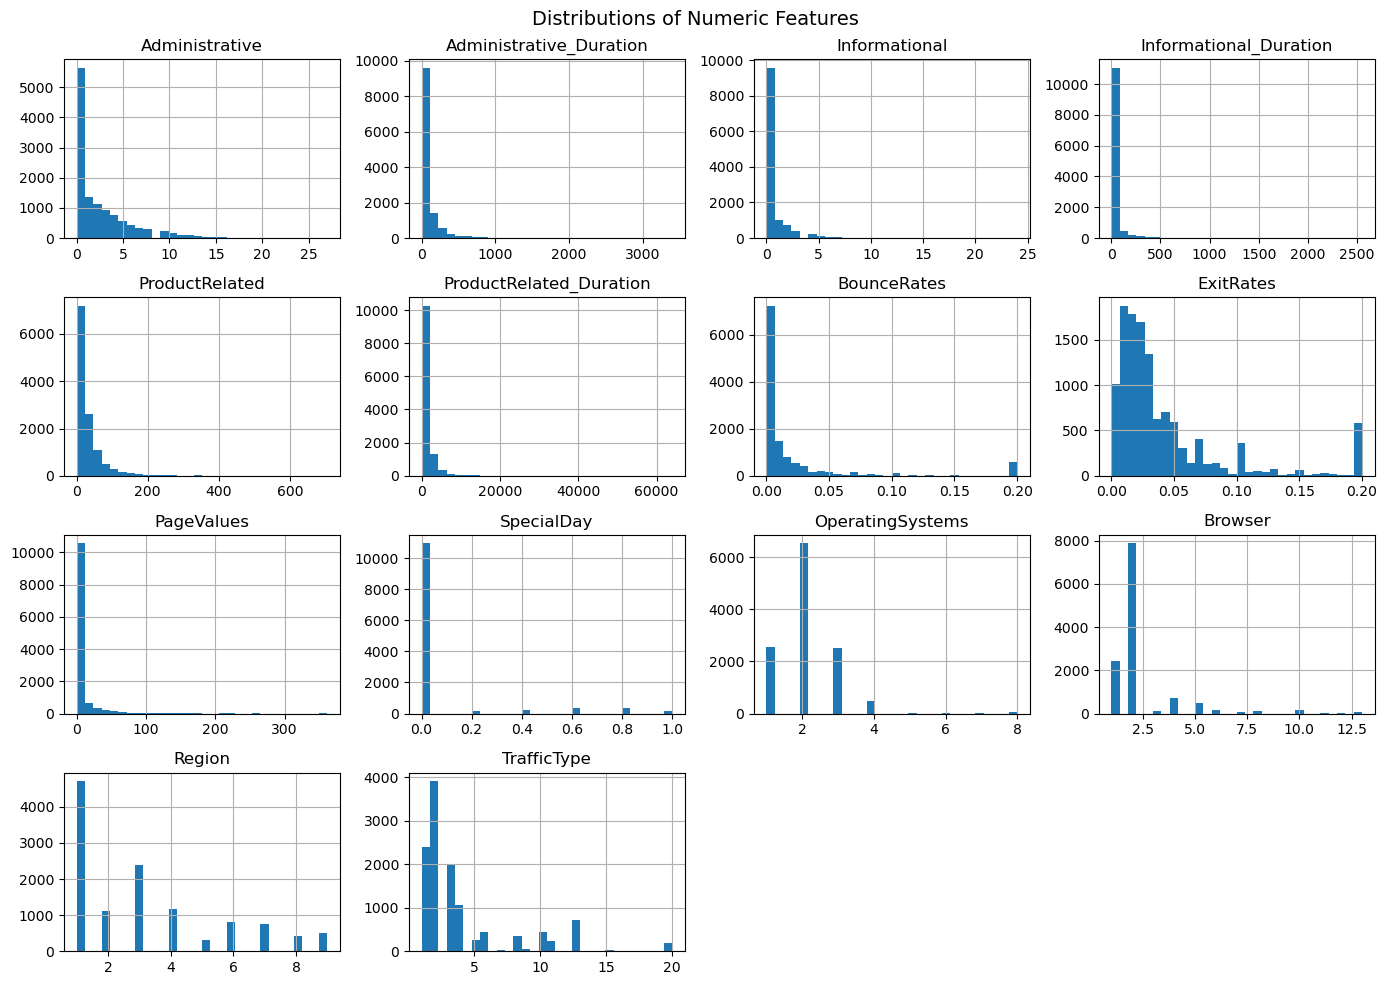

In [41]:
import matplotlib.pyplot as plt

df_clean[numeric_features].hist(bins=30, figsize=(14, 10))
plt.suptitle("Distributions of Numeric Features", fontsize=14)
plt.tight_layout()
plt.show()

## Key Observations

- Many count- and duration-based features (e.g., `Administrative_Duration`, `Informational_Duration`, `ProductRelated_Duration`) exhibit **strong right skew**, with most sessions showing low engagement and a small number of highly active sessions.
- Engagement rate variables such as `BounceRates` and `ExitRates` are concentrated near zero, indicating that most users do not immediately leave the site.
- `PageValues` shows a highly skewed distribution with a large mass at zero, reflecting that most sessions do not generate immediate revenue-related value.
- Integer-valued features such as `OperatingSystems`, `Browser`, `Region`, and `TrafficType` represent categorical identifiers rather than continuous quantities and should be interpreted accordingly.

## Implications for modeling 
The presence of skewed distributions and outliers motivates the use of models that are robust to non-normality, such as tree-based methods, while also informing potential scaling or transformation decisions for linear models such as logistic regression.

# Correlation Map

To examine relationships among numeric predictors and identify potential multicollinearity, we compute and visualize the correlation matrix using the cleaned dataset. Understanding correlations is particularly important for linear models such as logistic regression, where highly correlated predictors can affect coefficient stability and interpretability.

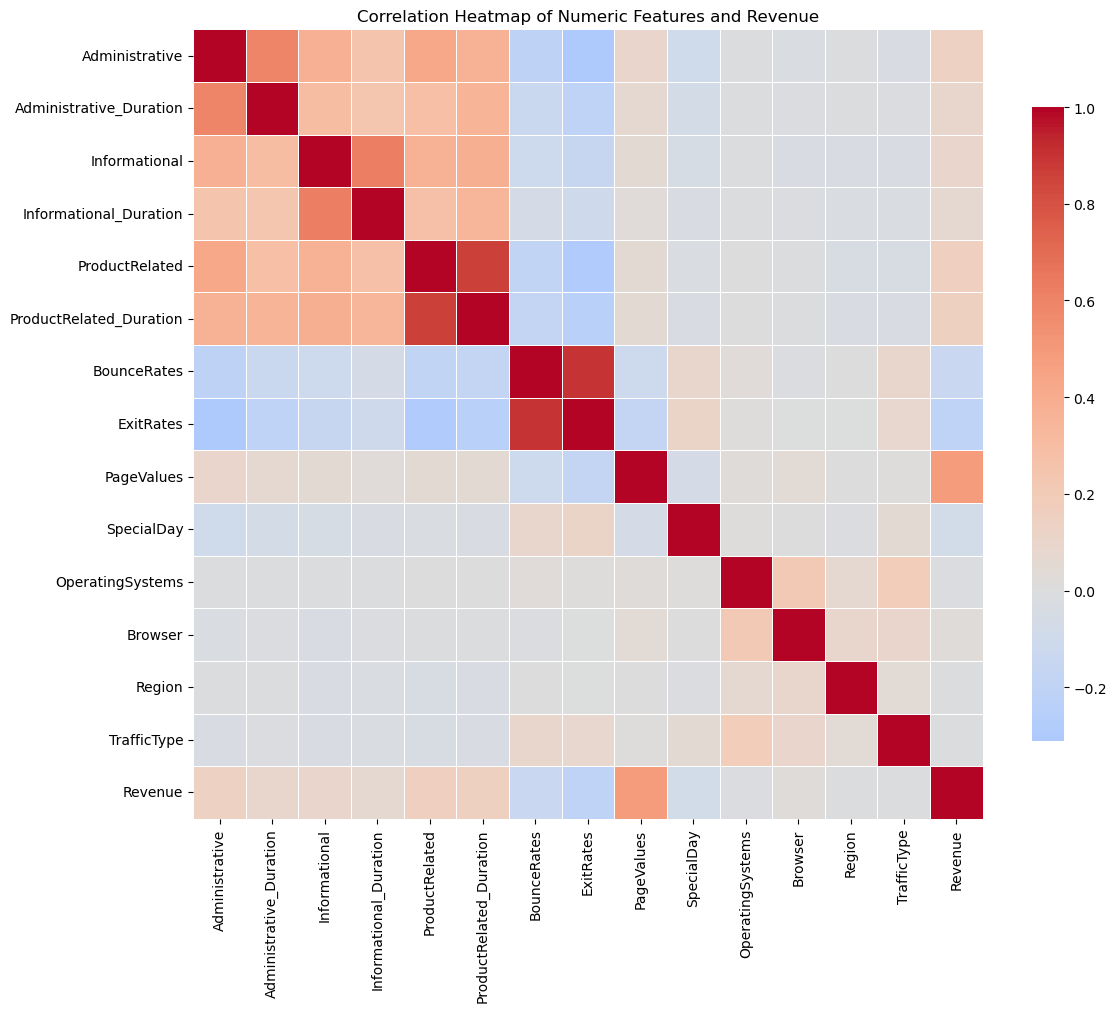

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix using cleaned data
corr = df_clean[numeric_features + ["Revenue"]].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap of Numeric Features and Revenue")
plt.tight_layout()
plt.show()

## Key Observations
- Strong positive correlations are observed among engagement-related features, particularly between page counts and their corresponding duration variables (e.g., `ProductRelated` and `ProductRelated_Duration`), indicating overlapping information.
- `BounceRates` and `ExitRates` exhibit a strong positive correlation, which is expected given their related definitions.
- `Revenue` shows positive correlation with engagement measures such as `PageValues`, `ProductRelated`, and `ProductRelated_Duration`, and negative correlation with `BounceRates` and `ExitRates`.
- Technical and contextual variables (e.g., `OperatingSystems`, `Browser`, `Region`, `TrafficType`) exhibit weak correlations with both `Revenue` and other engagement features.

## Implications for modeling
The presence of correlated engagement variables suggests potential multicollinearity concerns for logistic regression, motivating either regularization or careful interpretation of coefficients, while tree-based models are expected to handle these correlations more naturally.

# Numeric Feature Behavior vs Revenue

To further examine how user engagement differs between purchasing and non-purchasing sessions, we compare the average values of numeric features across Revenue classes. This analysis highlights behavioral patterns associated with purchasing outcomes and provides insight into which features may be most informative for prediction.

In [43]:
means = (
    df_clean
    .groupby("Revenue")[numeric_features]
    .mean()
    .T
    .rename(columns={0: "No Purchase", 1: "Purchase"})
)

means

Revenue,No Purchase,Purchase
Administrative,2.143440,3.393606
Administrative_Duration,74.635276,119.483244
Informational,0.457318,0.786164
Informational_Duration,30.603289,57.611427
ProductRelated,29.050403,48.210168
ProductRelated_Duration,1082.976881,1876.209615
BounceRates,0.023197,0.005117
ExitRates,0.045526,0.019555
PageValues,1.999985,27.264518
SpecialDay,0.069127,0.023166


## Mean differences between purchasing and non-purchasing sessions

To identify features with the strongest associations with purchasing behavior, we compute the difference in means between the two groups.

In [44]:
mean_diff = (
    means["Purchase"] - means["No Purchase"]
).sort_values(key=abs, ascending=False)

mean_diff

ProductRelated_Duration    793.232734
Administrative_Duration     44.847968
Informational_Duration      27.008138
PageValues                  25.264533
ProductRelated              19.159765
Administrative               1.250166
Informational                0.328846
Browser                      0.113255
Region                      -0.084171
TrafficType                 -0.062128
SpecialDay                  -0.045961
OperatingSystems            -0.037271
ExitRates                   -0.025970
BounceRates                 -0.018080
dtype: float64

### Key Observations

- Purchasing sessions exhibit substantially higher engagement, particularly in product-related activity and time spent on the website.
- `ProductRelated_Duration` shows the largest mean difference, indicating that users who purchase spend significantly more time on product pages.
- Administrative and informational durations are also higher for purchasing sessions, suggesting greater involvement in checkout-related and informational content.
- `PageValues` displays a large positive difference between purchasing and non-purchasing sessions, reflecting its strong association with conversion likelihood.
- `BounceRates` and `ExitRates` are lower on average for purchasing sessions, consistent with more sustained user engagement.

### Implications for modeling

These results indicate that purchasing behavior is strongly associated with higher engagement across multiple dimensions of browsing activity. Features capturing time spent and depth of interaction are expected to be highly informative for predictive modeling, while variables with minimal mean differences may contribute less to linear models but remain useful for tree-based approaches.

# Example Visualizations

To visually illustrate these differences, we present boxplots for selected high-impact features.

<Figure size 640x480 with 0 Axes>

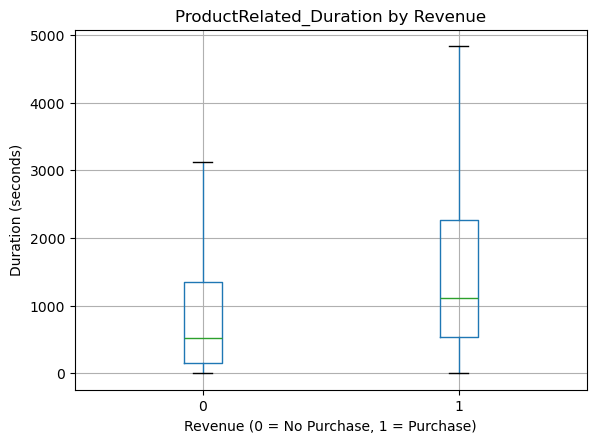

<Figure size 640x480 with 0 Axes>

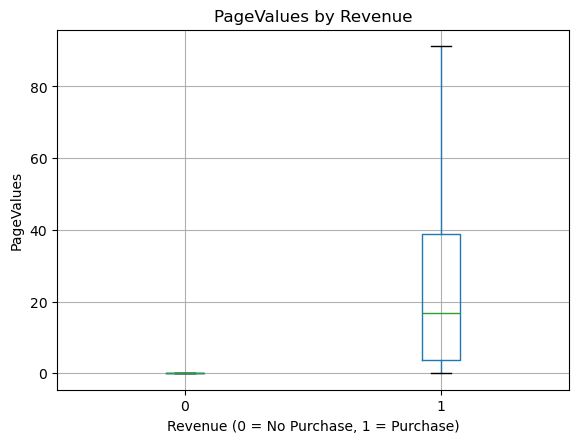

In [47]:
import matplotlib.pyplot as plt

plt.figure()
df_clean.boxplot(
    column="ProductRelated_Duration",
    by="Revenue",
    showfliers=False
)
plt.title("ProductRelated_Duration by Revenue")
plt.suptitle("")
plt.xlabel("Revenue (0 = No Purchase, 1 = Purchase)")
plt.ylabel("Duration (seconds)")
plt.show()

plt.figure()
df_clean.boxplot(
    column="PageValues",
    by="Revenue",
    showfliers=False
)
plt.title("PageValues by Revenue")
plt.suptitle("")
plt.xlabel("Revenue (0 = No Purchase, 1 = Purchase)")
plt.ylabel("PageValues")
plt.show()

# Summary

EDA reveals clear behavioral differences between purchasing and non-purchasing online shopping sessions. After removing duplicated sessions and encoding the response variable, we observe a moderately imbalanced target distribution, with approximately 15.6% of sessions resulting in a purchase. Numeric features related to user engagement—particularly time spent on product-related, administrative, and informational pages—exhibit strong right-skewed distributions and show substantial differences between the two Revenue classes.

Correlation analysis highlights strong relationships among engagement-based variables, such as page counts and their corresponding duration measures, as well as between bounce and exit rates, indicating potential multicollinearity that may affect linear models. In contrast, technical and contextual features, including browser, operating system, region, and traffic type, display weak associations with purchasing outcomes. Overall, the EDA suggests that user engagement intensity is the primary driver of purchasing behavior and motivates the use of both interpretable linear models and flexible tree-based models to balance predictive performance and interpretability in subsequent analysis.

# Save cleaned dataset

In [48]:
df_clean.to_csv(
    "../data/clean_data_eda.csv",
    index=False
)